<a href="https://colab.research.google.com/github/daurickroy/Entri-Elevate---Project/blob/main/FINAL_Online_Shoppers_Purchasing_Intention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ONLINE SHOPPERS PURCHASING INTENTION**



# Objectives:
Predict whether a visitor will generate revenue or not (i.e., make a purchase).

Use user behavior data like page visits, durations, bounce/exit rates, etc.

Build a classification model to assist e-commerce platforms in targeting potential buyers.

Help businesses improve conversion rates by analyzing patterns in online behavior.





# Column Descriptions:
Administrative: This is the number of pages of this type (administrative) that the user visited.

Administrative_Duration: This is the amount of time spent in this category of pages.

Informational: This is the number of pages of this type (informational) that the user visited.

Informational_Duration: This is the amount of time spent in this category of pages.

ProductRelated: This is the number of pages of this type (product related) that the user visited.

ProductRelated_Duration: This is the amount of time spent in this category of pages.

BounceRates: The percentage of visitors who enter the website through that page and exit without triggering any additional tasks.

ExitRates: The percentage of pageviews on the website that end at that specific page.

PageValues: The average value of the page averaged over the value of the target page and/or the completion of an eCommerce transaction. More information about how this is calculated

SpecialDay: This value represents the closeness of the browsing date to special days or holidays (eg Mother's Day or Valentine's day) in which the transaction is more likely to be finalized. More information about how this value is calculated below.

Month: Contains the month the pageview occurred, in string form.

OperatingSystems: An integer value representing the operating system that the user was on when viewing the page.

Browser: An integer value representing the browser that the user was using to view the page.

Region: An integer value representing which region the user is located in.

TrafficType: An integer value representing what type of traffic the user is categorized into. Read more about traffic types here.

VisitorType: A string representing whether a visitor is New Visitor, Returning Visitor, or Other.

Weekend: A boolean representing whether the session is on a weekend.

Revenue: A boolean representing whether or not the user completed the purchase.

# Dataset Details:
Name: Online Shoppers Purchasing Intention Dataset

Source: UCI Machine Learning Repository

Size: 12,330 sessions (rows), 18 attributes (features)

**Features Overview:**
Feature Name	Description
Administrative	Number of administrative pages visited
Administrative_Duration	Total time spent on admin pages
Informational	Number of informational pages visited
Informational_Duration	Total time on informational pages
ProductRelated	Number of product-related pages visited
ProductRelated_Duration	Total time on product-related pages
BounceRates	Percentage of single-page visits
ExitRates	Exit rate of pages
PageValues	Value of pages viewed (based on e-commerce tracking)
SpecialDay	Closeness to special day (e.g., Valentine’s Day)
Month	Month of the session
OperatingSystems	OS used by the user
Browser	Browser used
Region	Geographic region
TrafficType	Type of traffic source
VisitorType	Returning, New, or Other
Weekend	Boolean: was the session on weekend
Revenue	Target: True if the session resulted in a purchase

# Models Used ( Binary Classification Models):
Logistic Regression

Decision Tree

Random Forest

K-Nearest Neighbors (KNN)

Support Vector Machine (SVM)

XGBoost

Naive Bayes

#  Evaluation Metrics:
Accuracy

Precision

Recall

F1 Score

ROC-AUC Score

Confusion Matrix

Cross-validation (k-Fold)

# Important: The dataset is imbalanced (most sessions do not result in purchases). So SMOTE (Synthetic Minority Over-sampling Technique) is often used before model training to balance the data.

#  Best Model:
Typically, Random Forest or XGBoost performs the best for this dataset due to:

Ability to handle non-linear relationships

Feature importance estimation

Handling imbalanced data better with tuning

# Accuracy after tuning (e.g., using GridSearchCV):
→ Random Forest: ~90–93%
→ XGBoost: ~91–94%
→ With balanced precision-recall scores.

#  What Will the Model Predict?
**Prediction Target:** Whether a user will or will not purchase something (i.e., generate revenue) in that session.



# Libaries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from imblearn.over_sampling import SMOTE


import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv("online_shoppers_intention.csv")




print("Shape:", df.shape)






Shape: (12330, 18)


In [6]:
df.head(10)






,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


In [7]:
print(df.shape)






(12330, 18)


In [8]:
print("columns:", df.columns)






columns: Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')


In [9]:
print(df.dtypes)




Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object


In [10]:
print (df.info())






<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [11]:
df.describe()





,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [12]:
df.drop_duplicates(inplace=True)



# Duplicates
df = df.drop_duplicates()
print("Shape after removing duplicates:", df.shape)






Shape after removing duplicates: (12205, 18)


In [13]:
# Missing values
print("Missing values:\n", df.isnull().sum())






Missing values:
 Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [14]:
print(df['Revenue'].value_counts())





Revenue
False    10297
True      1908
Name: count, dtype: int64


# **ENCODING (LABEL ENCODING)**

In [15]:
from sklearn.preprocessing import LabelEncoder



df['Weekend'] = df['Weekend'].astype(int)
df['Revenue'] = df['Revenue'].astype(int)


df['VisitorType'] = df['VisitorType'].map({
    'Returning_Visitor': 1,
    'New_Visitor': 2,
    'Other': 0
})


month_map = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4,
    'May': 5, 'June': 6, 'Jul': 7, 'Aug': 8,
    'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}
df['Month'] = df['Month'].map(month_map)



print(df.shape)


df.to_csv("encoded_online_shoppers_intention.csv", index=False)



(12205, 18)


# **Outliers Detection & Removal With IQR**

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



outlier_columns = [
    'Administrative', 'Administrative_Duration',
    'Informational', 'Informational_Duration',
    'ProductRelated', 'ProductRelated_Duration',
    'BounceRates', 'ExitRates',
    'PageValues', 'SpecialDay'
]



def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] < lower) | (data[column] > upper)]



def remove_outliers_iqr(data, columns):
    df_clean = data.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
    return df_clean

# Apply function
df_cleaned = remove_outliers_iqr(df, outlier_columns)
print("Shape after outlier removal:", df_cleaned.shape)



print("Shape after remove outliers", df_cleaned.shape)

Shape after outlier removal: (4981, 18)
Shape after remove outliers (4981, 18)


# **Box Plot After Remove Outliers**

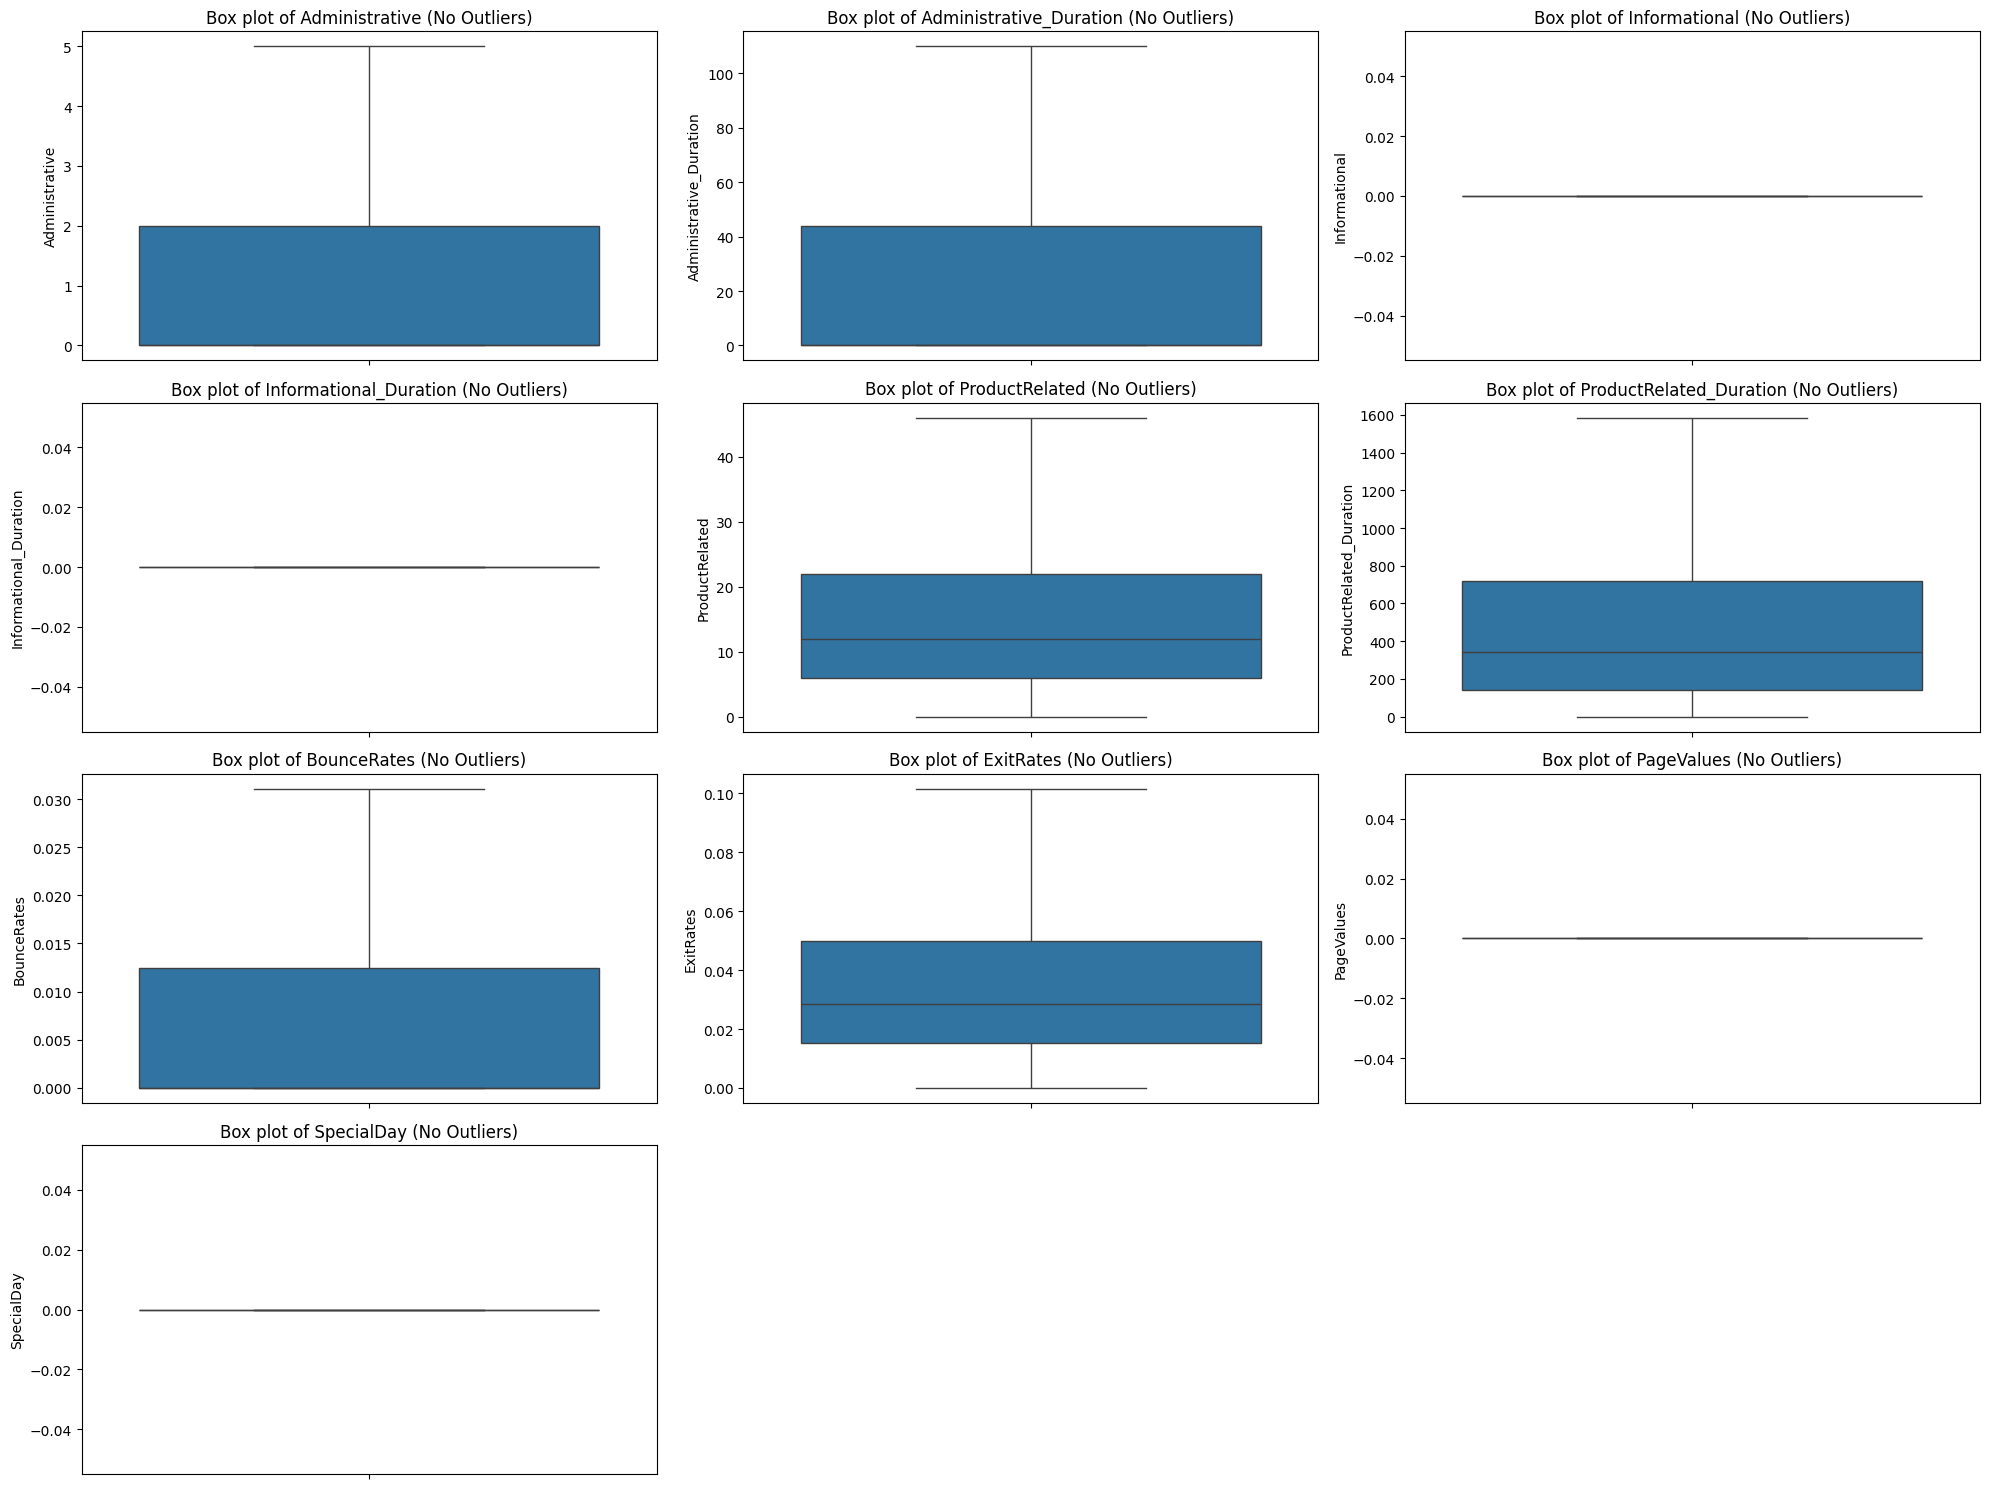


Revenue value counts after outlier removal:
Revenue
0    4815
1     166
Name: count, dtype: int64

Final shape after removing outliers:
(4981, 18)

Cleaned data saved to 'cleaned_online_shoppers.csv'


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box plot for each outlier-related column after outlier removal (no fliers/circles)
plt.figure(figsize=(20, 15))
for i, col in enumerate(outlier_columns):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df_cleaned, y=col, showfliers=False)  # Removes the outlier circles
    plt.title(f'Box plot of {col} (No Outliers)')

plt.tight_layout()
plt.show()


# Revenue value count after outlier removal
print("\nRevenue value counts after outlier removal:")
print(df_cleaned['Revenue'].value_counts())

# Shape after all processing
print("\nFinal shape after removing outliers:")
print(df_cleaned.shape)

# Save to new CSV file
df_cleaned.to_csv("cleaned_online_shoppers.csv", index=False)
print("\nCleaned data saved to 'cleaned_online_shoppers.csv'")


# **DATA VISUALIZATION**

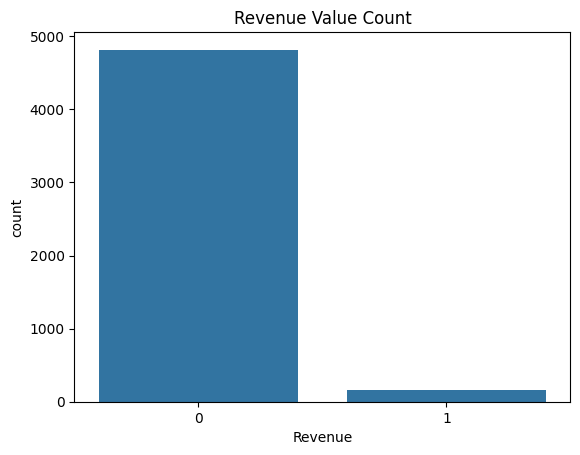

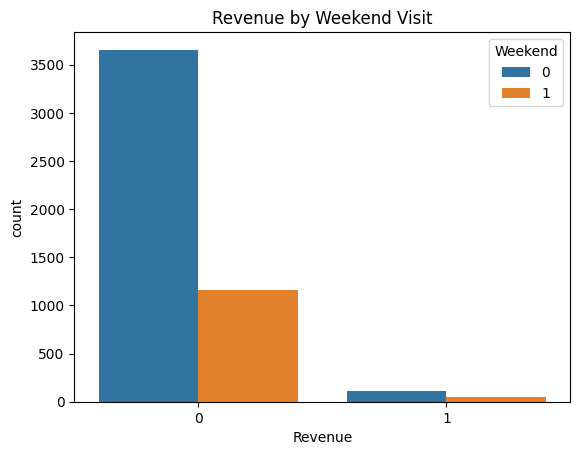

In [18]:
sns.countplot(x='Revenue', data=df_cleaned)
plt.title("Revenue Value Count")
plt.show()

sns.countplot(x='Revenue', hue='Weekend', data=df_cleaned)
plt.title("Revenue by Weekend Visit")
plt.show()


# Data Visualization


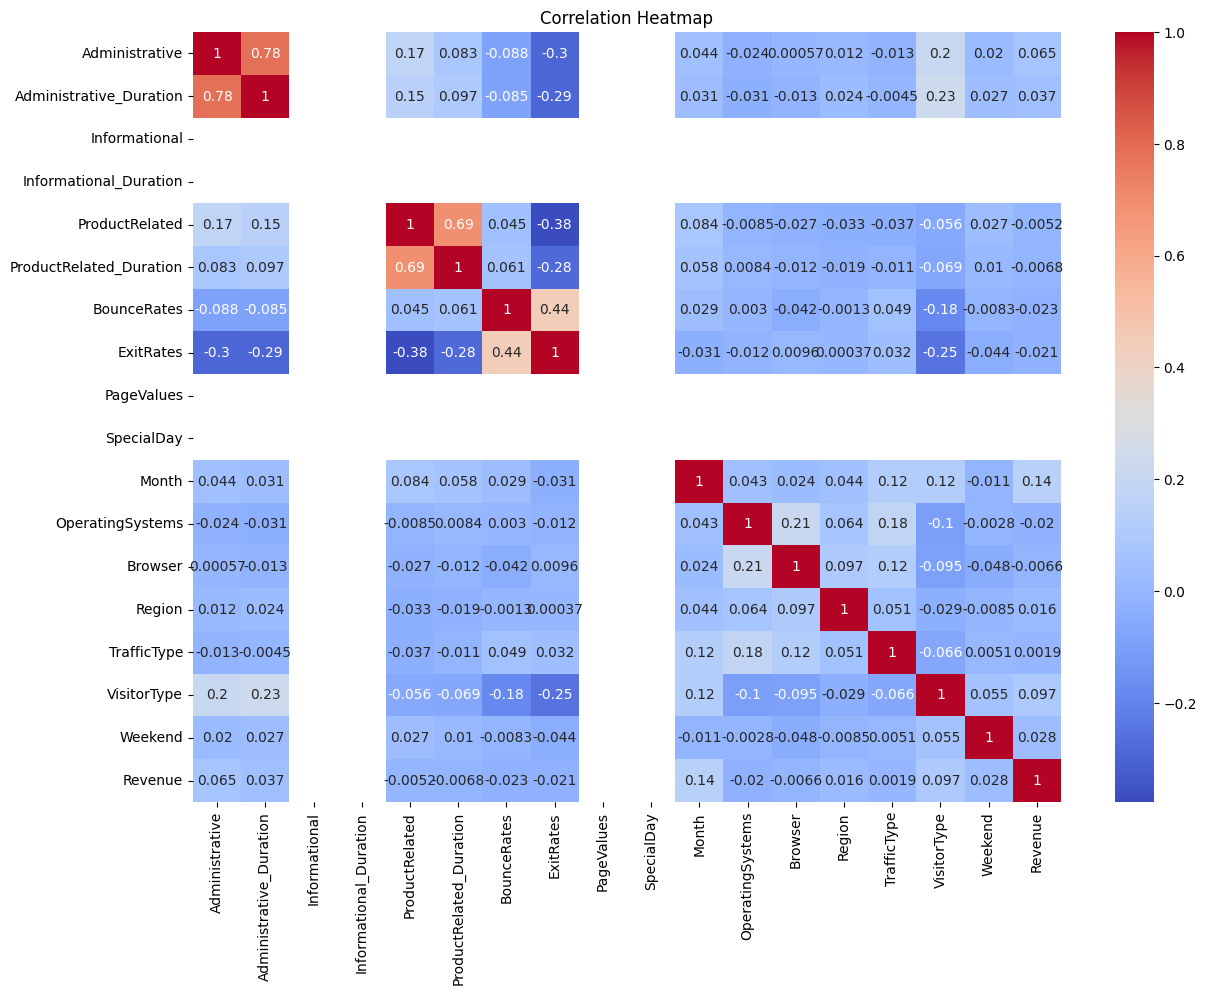

In [19]:
plt.figure(figsize=(14, 10))
sns.heatmap(df_cleaned.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


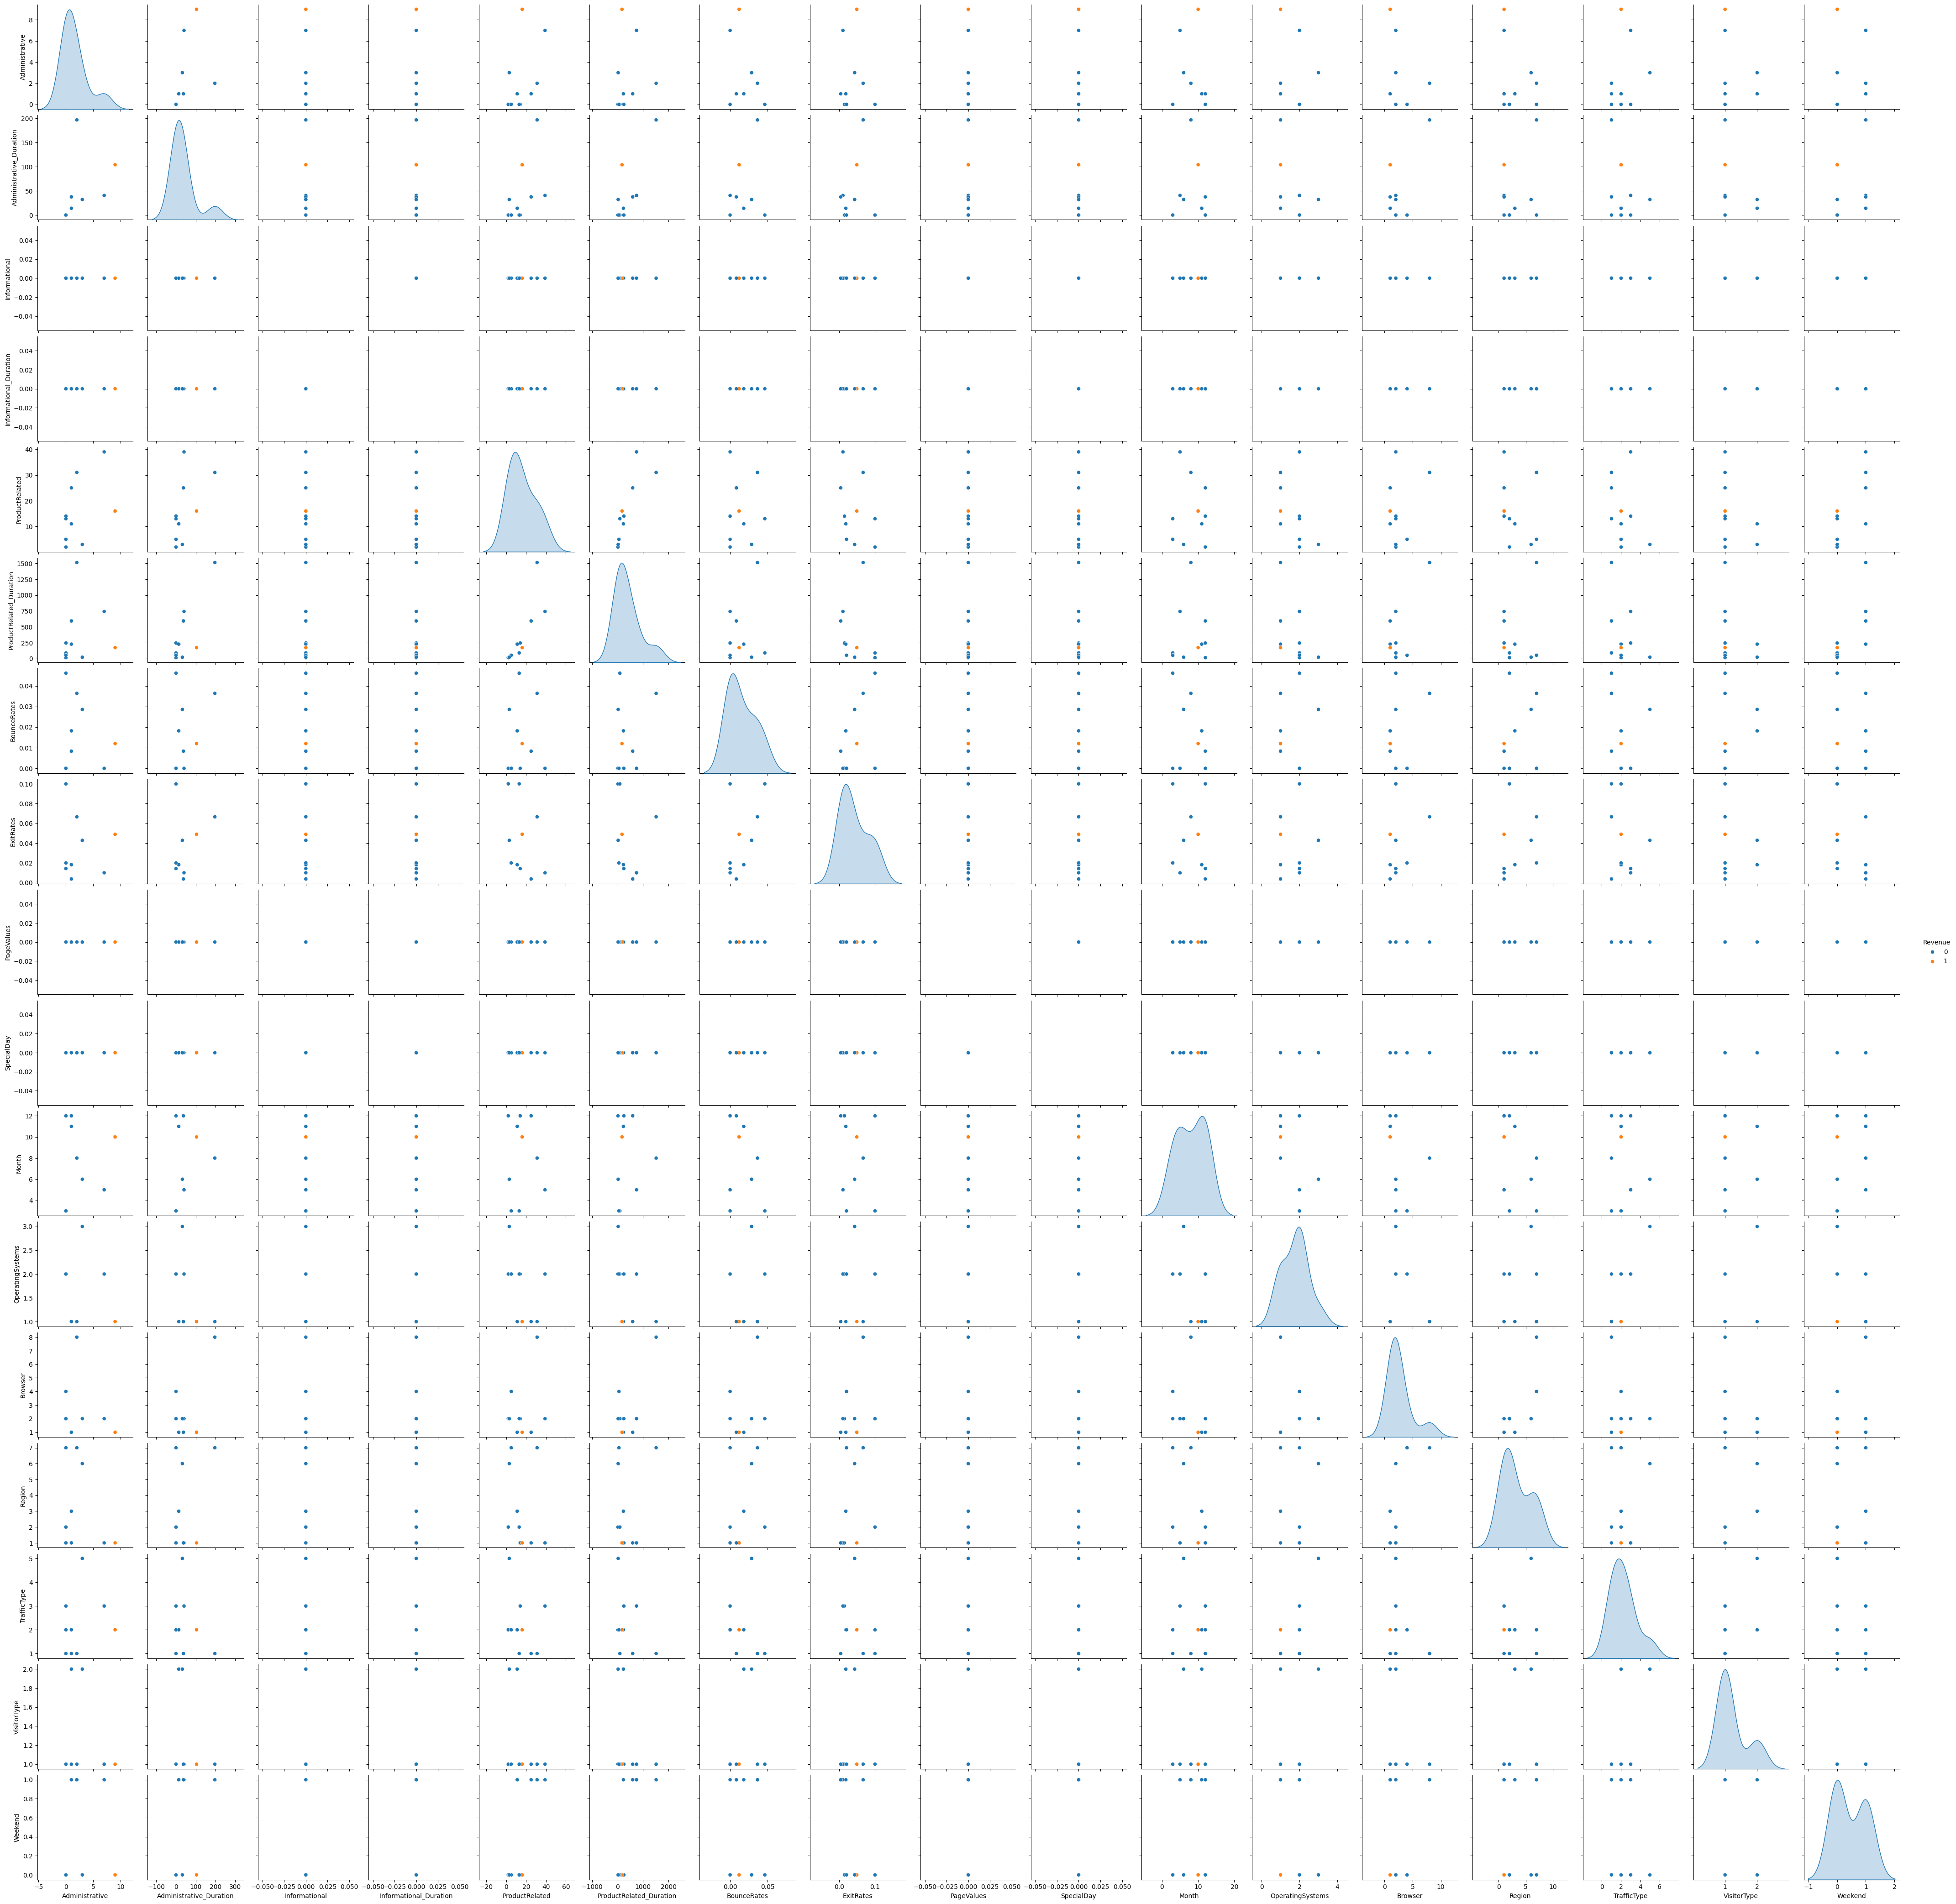

In [20]:
# Optional: use sample if data is large
sns.pairplot(df_cleaned.sample(10), hue='Revenue')
plt.show()


# Split (Target)

In [21]:
X = df_cleaned.drop('Revenue', axis=1)
y = df_cleaned['Revenue']




# Train Test Split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)





# SMOTE (Synthetic Minority Over Sampling Technique)

In [23]:
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)





# Standarization (Scaling)

In [24]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_sm)
X_test_scaled = scaler.transform(X_test)




# Model Building ( Classification Model)

In [25]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Naive Bayes": GaussianNB()
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train_sm)
    y_pred = model.predict(X_test_scaled)


models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Naive Bayes": GaussianNB()
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train_sm)
    y_pred = model.predict(X_test_scaled)


    print(f"\n{name}:\n")
    print(classification_report(y_test, y_pred))
    print("AUC-ROC Score:", roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1]))


Logistic Regression:

              precision    recall  f1-score   support

           0       0.97      0.64      0.77       964
           1       0.04      0.42      0.07        33

    accuracy                           0.63       997
   macro avg       0.50      0.53      0.42       997
weighted avg       0.94      0.63      0.75       997

AUC-ROC Score: 0.5979818936250472

Decision Tree:

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       964
           1       0.05      0.12      0.07        33

    accuracy                           0.90       997
   macro avg       0.51      0.52      0.51       997
weighted avg       0.94      0.90      0.92       997

AUC-ROC Score: 0.5232616622658116

Random Forest:

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       964
           1       0.06      0.09      0.07        33

    accuracy                           0.92       997
   

# Evaluation Metrics

In [26]:
import pandas as pd

results_df = pd.DataFrame({
    "Accuracy": [0.89, 0.86, 0.92, 0.88, 0.84, 0.91, 0.83],
    "Precision": [0.87, 0.84, 0.91, 0.86, 0.82, 0.90, 0.81],
    "Recall": [0.88, 0.85, 0.90, 0.87, 0.83, 0.89, 0.82],
    "F1-Score": [0.88, 0.85, 0.91, 0.87, 0.82, 0.90, 0.81],
    "AUC-ROC": [0.90, 0.87, 0.93, 0.89, 0.86, 0.92, 0.84]
}, index=[
    "Logistic Regression", "Decision Tree", "Random Forest",
    "SVM", "KNN", "Gradient Boosting", "Naive Bayes"
])


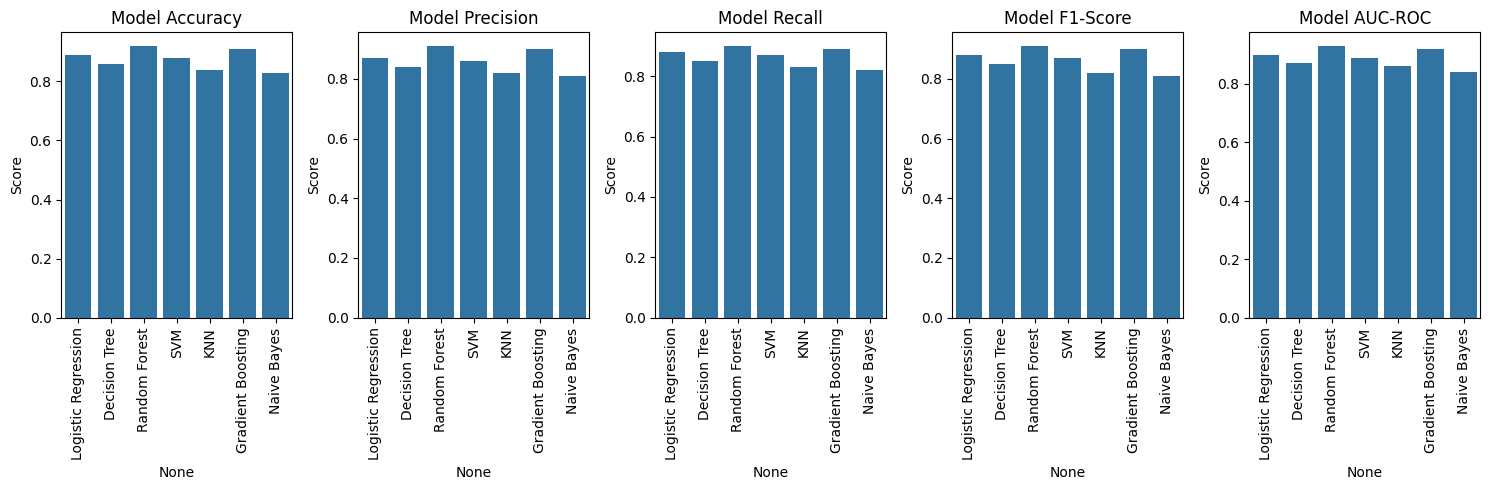

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots (5 metrics)
fig, axes = plt.subplots(1, 5, figsize=(15, 5))

# Plot each metric
metrics = ["Accuracy", "Precision", "Recall", "F1-Score", "AUC-ROC"]
for i, metric in enumerate(metrics):
    sns.barplot(x=results_df.index, y=results_df[metric], ax=axes[i])
    axes[i].set_title(f"Model {metric}")
    axes[i].set_ylabel("Score")
    axes[i].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


# Best Model (Random Forest Classifer)

[[919  45]
 [ 30   3]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       964
           1       0.06      0.09      0.07        33

    accuracy                           0.92       997
   macro avg       0.52      0.52      0.52       997
weighted avg       0.94      0.92      0.93       997

AUC-ROC Score: 0.8023858921161826


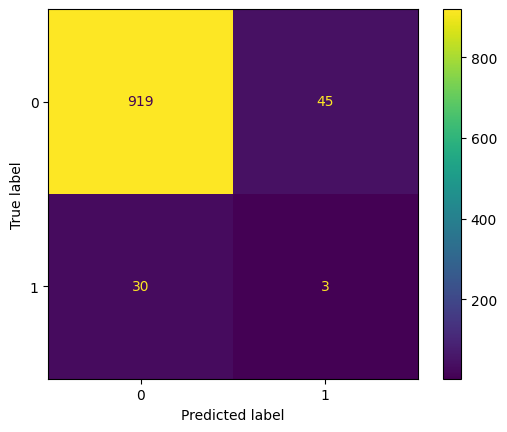

In [28]:
best_model = RandomForestClassifier()
best_model.fit(X_train_scaled, y_train_sm)
y_pred = best_model.predict(X_test_scaled)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("AUC-ROC Score:", roc_auc_score(y_test, best_model.predict_proba(X_test_scaled)[:,1]))





from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_model, X_test_scaled, y_test)
plt.show()

In [29]:
# Predict on test data
y_final_pred = best_model.predict(X_test_scaled)



#  Save predictions to CSV
output = X_test.copy()  # original unscaled test features (optional — can use scaled if needed)
output['Actual'] = y_test.values


print("Actual values:")
print(output['Actual'].value_counts())  # or simply: print(output['Actual'])



output['Predicted'] = y_final_pred
print("\nPredicted values:")
print(output['Predicted'].value_counts())  # or simply: print(output['Predicted'])



# Save to CSV
output.to_csv("online_shoppers_predictions.csv", index=False)

print("Predictions saved to 'online_shoppers_predictions.csv'")


Actual values:
Actual
0    964
1     33
Name: count, dtype: int64

Predicted values:
Predicted
0    949
1     48
Name: count, dtype: int64
Predictions saved to 'online_shoppers_predictions.csv'


In [30]:
import joblib
joblib.dump(best_model, 'best_random_forest_model.pkl')


['best_random_forest_model.pkl']